In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 5: Statistics and Probability

Today we will review of some statistics and probability needed for doing data analysis.


First, let's do a quick survey on number of FB friends of people in this class.

In [2]:
data = [
        (1, 100),
        (2, 200),
        (3, 300),
        (4, 400),
        (5, 500),
        (6, 600),
        (7, 400),
        (8, 200),
]

stuId, num_friends = zip(*data)

To look at how the data is distributed, we can look at the histogram plot. The histogram plot is very useful for describing a single dimenstion of the data.

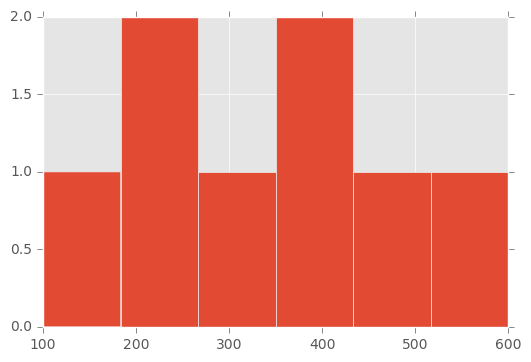

In [3]:
(n, bins, patches) = plt.hist(num_friends, bins=6)

Sometimes, you just want only a quick summary about the data. So you start generating some statistics:

In [4]:
# Number of data points
print "num of data point: ",len(num_friends)

# Maximum value
print "max = ",max(num_friends)

# Minimum value
print "min = ",min(num_friends)

# 2nd smallest
sorted_num_friends = sorted(num_friends)
print "2nd smallest = ",sorted_num_friends[1]

num of data point:  8
max =  600
min =  100
2nd smallest =  200


Many times, we'd like to know where our data is centered.

In [5]:
# Mean
print "mean:",np.mean(num_friends)

# Median
print "median:",np.median(num_friends)

mean: 337.5
median: 350.0


Although the mean is easy to calculate i.e. $\frac{1}{n} \sum_1^n x_i$, it is sensitive to **outliers**.

In [9]:
num_friends_with_outlier = num_friends + (1000000,)

# Mean
print "mean:",np.mean(num_friends_with_outlier)

# Median
print "median:",np.median(num_friends_with_outlier)

mean: 111411.111111
median: 400.0


### Dispersion

The term *Dispersion* refers to measures of how spread out our data is. A very simple statistics is `range` which is simply the difference between the minimum and the maximum values. Consider the following.

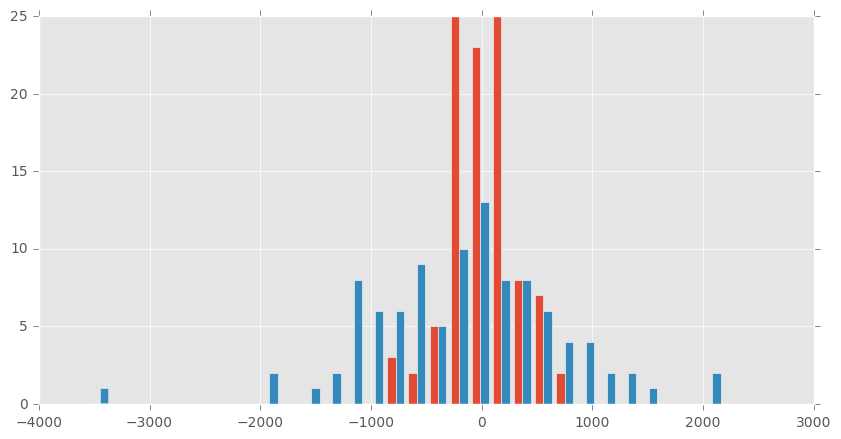

In [10]:
data1 = np.random.randn(1,100)*300
data2 = np.random.randn(1,100)*1000

plt.figure(figsize=(10,5))
(n,bins,_) = plt.hist([data1,data2],bins=30)

In [11]:
# Measure dispersion of the two datasets using range, variance, standard deviation, interquartile range

## Correlation

Suppose you want to investigate relationship between two variables. Lets verify if student ids are related to number of friends

In [12]:
np.cov(stuId, num_friends)

array([[     6.    ,    192.8571],
       [   192.8571,  28392.8571]])

Covariance is difficult to interpret. It's more common to look at the Pearson correleation coefficient.

>The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [13]:
(r,_) = stats.pearsonr(stuId, num_friends)
print r

0.467256718486


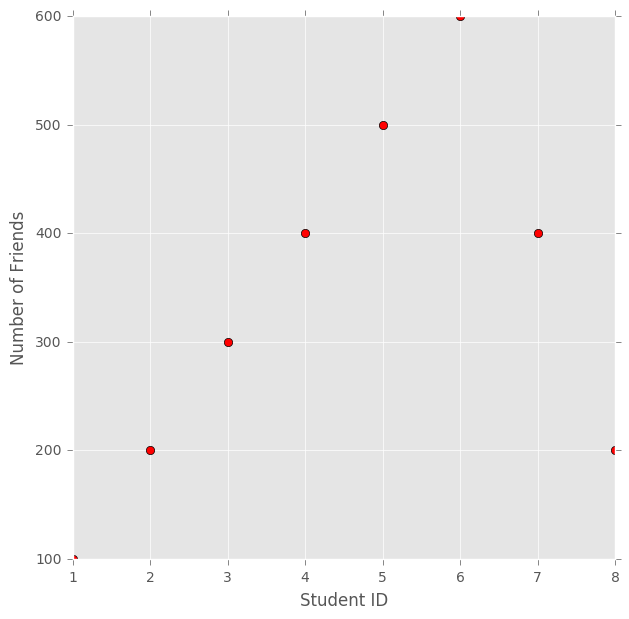

In [14]:
plt.figure(figsize=(7,7))
plt.plot(stuId, num_friends, 'or')
plt.xlabel('Student ID')
plt.ylabel('Number of Friends')

## Simpson's Paradox

One not uncommon surprise when analyzing data is Simpson’s Paradox, in which correlations can be misleading when **confounding** variables are ignored.

In [34]:
west_phd = np.random.randn(35,1)+3.1
east_phd = np.random.randn(70,1)+3.3
west_nonphd = np.random.randn(66,1)+10.9
east_nonphd = np.random.randn(33,1)+13.4


In [35]:
west = np.concatenate([west_phd, west_nonphd],axis=0)
east = np.concatenate([east_phd, east_nonphd],axis=0)

In [36]:
print "west",west.mean()
print "east",east.mean()

west 8.12005806436
east 6.49948489602


In [37]:
print "west phd",west_phd.mean()
print "east phd",east_phd.mean()
print "west nonphd",west_nonphd.mean()
print "east nonphd",east_nonphd.mean()

west phd 3.21857251178
east phd 3.15423759414
west nonphd 10.7193307059
east nonphd 13.5954640212


## Correlation and Causation

You have probably heard at some point that “correlation is not causation,” most likely by someone looking at data that posed a challenge to parts of his worldview that he was reluctant to question. Nonetheless, this is an important point—if x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or it might mean nothing.

# Probability

Let's talk about this on the board... Feel free to take notes here.

Topics:
- Dependence and Independence
- Conditional Probability
- Bayes's Theorem
- Random Variables
- Continuous Distributions (Uniform and Normal)
- The Central Limit Theorem (CLT)

## Demo: The Central Limit Theorem
One reason the normal distribution is so useful is the central limit theorem, which says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately nor‐ mally distributed.


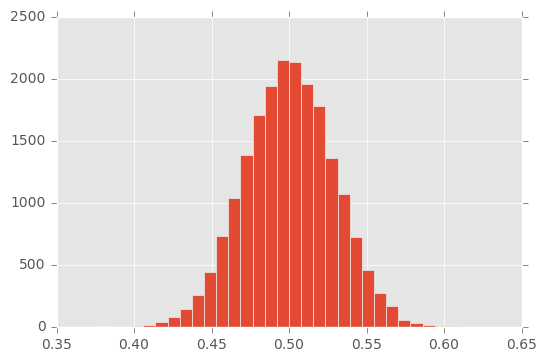

In [46]:
ys = []
for i in range(20000):
    x = np.random.rand(100,1)
    ys.append(x.mean())
_ = plt.hist(ys,bins=30)